In [123]:
options(repr.plot.width=8, repr.plot.height=4)



# R and Stan

----

### Mathew Hall


# Example 

(Shamefully stolen from Krushke)

<img src="coin.jpg">

Suppose you are given a coin. Let's pretend the coin has a fixed bias set by the factory that produced it

1. How can we model this process?
2. How can we fit a model of the process to the data we have?
3. Given the above, what can we say about the coin?


Image credit: hom26 on Flickr CC BY-NC-ND 2.0

# Modelling a coin flip with a bias


In [174]:
# Simulate a coin flip:
flip <- function(n,p) {
    sample(c('H','T'), p=c(p,1-p),size = n,replace=T)
}

flip(10,0.5)

[1] "H" "H" "H" "H" "T" "T" "T" "H" "H" "T"

In [146]:
table(flip(1000,0.5))


  H   T 
496 504 

In [175]:
heads <- function(n,p) {
    sum(flip(n,p) == 'H')
}

heads(1000,0.5)

[1] 497

# Modelling *The Coin*

The mystery is just a function that returns the number of heads in a given set of flips. The probability is fixed, but we don't know what that probability is.

In [142]:
magic <- function() 0.3

In [153]:
bias <- magic() #Bias for coins made by the factory


coin <- function(n)heads(n,bias)


coin(50)

[1] 15

# Can we simulate it yet?

We now have the means to simulate a coin

But we have a parameter (`bias`); what value should we use?


What we're asking for are *values of parameters of the model*. 

If we know what number `bias` the coin is using we can say whether it's fair or not.

# Guessing `bias`

Suppose we have a coin, and we observe $15$ heads in $50$ flips. What should be our guess of the bias for the coin?

We could guess `bias` by creating a lot of coins with different biases and see which one best fits the data we got (gets closest to 15).

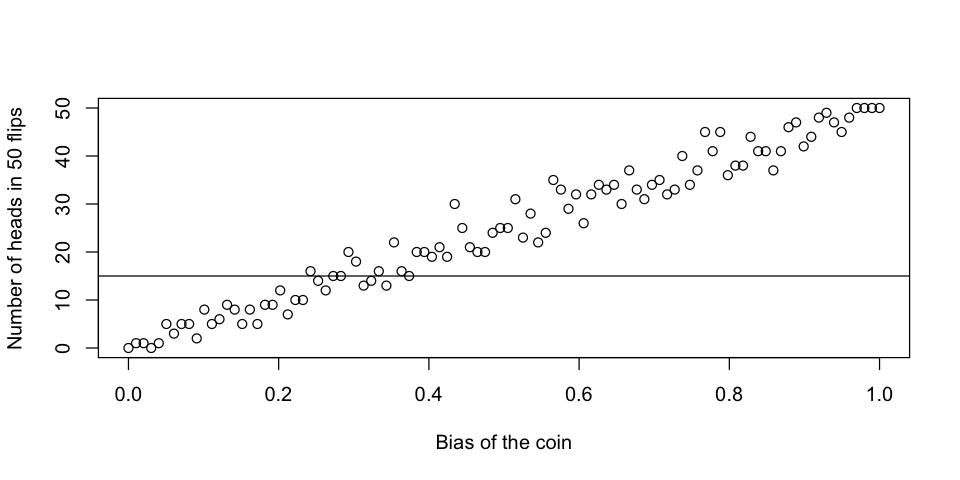

In [177]:
bias <- seq(0,1,length.out = 100)
plot(bias,sapply(bias, function(x)heads(50,x)), ylab="Number of heads in 50 flips", xlab="Bias of the coin")
abline(h=15)

This doesn't work too well.

Suppose we flipped the coin 50 times and repeated it 10,000 times. How many heads would we see?

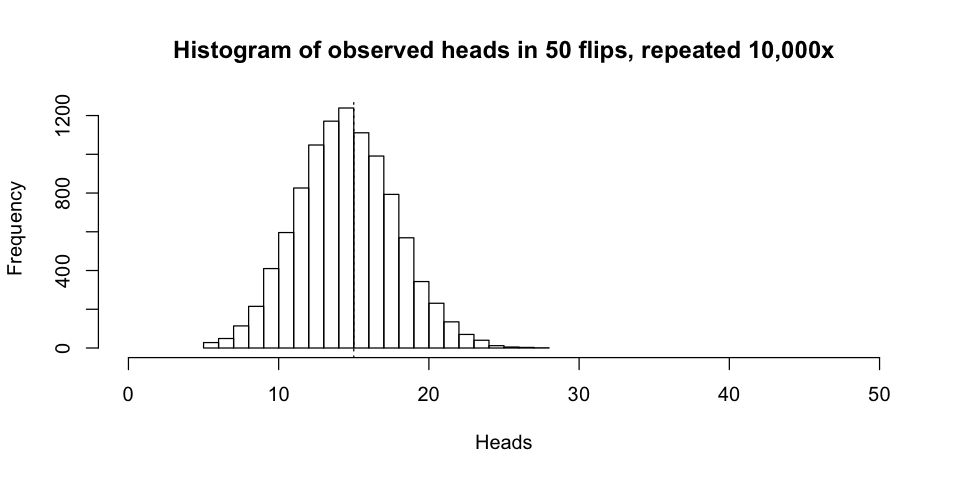

In [127]:
hist(replicate(10000, coin(50)),
     breaks = 30, 
     xlim=c(0,50),
     xlab="Heads",
     main="Histogram of observed heads in 50 flips, repeated 10,000x")
abline(v = 15, lty=3)

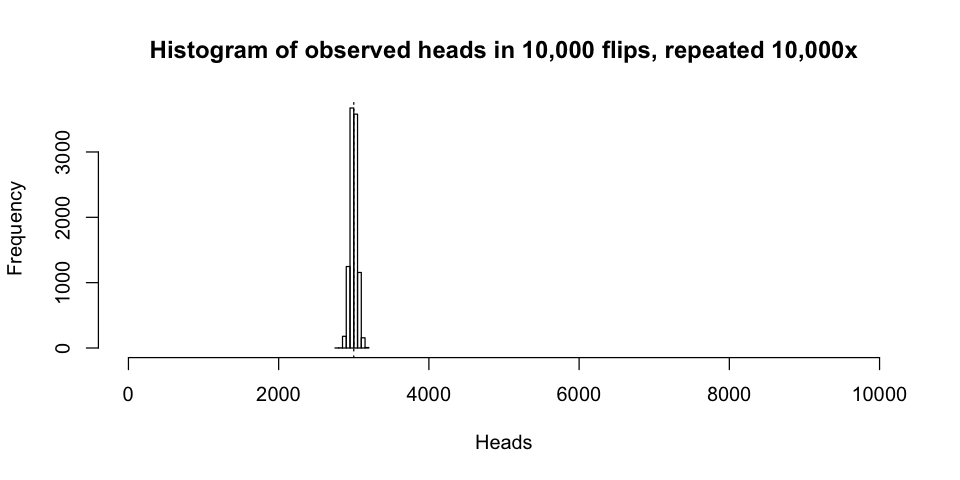

In [166]:
hist(replicate(10000, coin(10000)),
     breaks = 12, 
     xlim=c(0,10000),
     xlab="Heads",
     main="Histogram of observed heads in 10,000 flips, repeated 10,000x")
abline(v = 0.3 * 10000, lty=3)

# Randomness

If we saw 16 or 14 heads in those 50 flips, we'd reach a slightly different conclusion.

We can't control this randomness.

We can always get more data, but that's expensive.

If we can't reduce the variation to a tiny number, we're just going to have to live with it.

Instead of saying what single value $p$ is, let's **offer to give a distribution for it instead.**

# Incorporating Belief

We can characterise what we think a parameter for this model might be as a distribution.

If a coin is probably fair, its bias is $0.5$.

But we should be quite vague about it, I'll assign 95% of my belief to the value being roughly between 0.2 and 0.8.

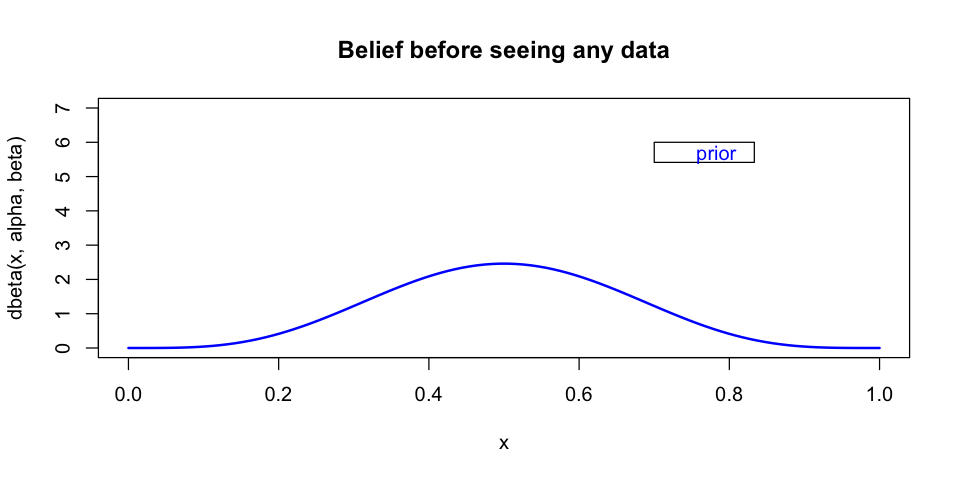

In [172]:
plot(x, dbeta(x,alpha,beta), lwd=2, type='l', col='blue',ylim=c(0,7), main="Belief before seeing any data")

legend(0.7,6,legend = c("prior"), text.col = c("blue"))

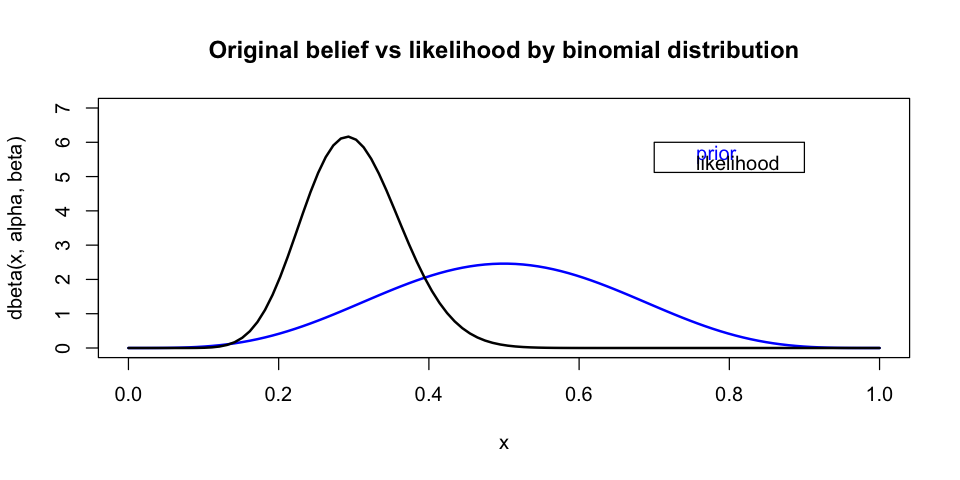

In [173]:
plot(x, dbeta(x,alpha,beta), lwd=2, type='l', col='blue',ylim=c(0,7), main="Original belief vs likelihood by binomial distribution")
lines(x,dbeta(x,15,35), type='l',lwd=2,xlab="Bias",ylab="Likelihood")

legend(0.7,6,legend = c("prior","likelihood"), text.col = c("blue","black"))

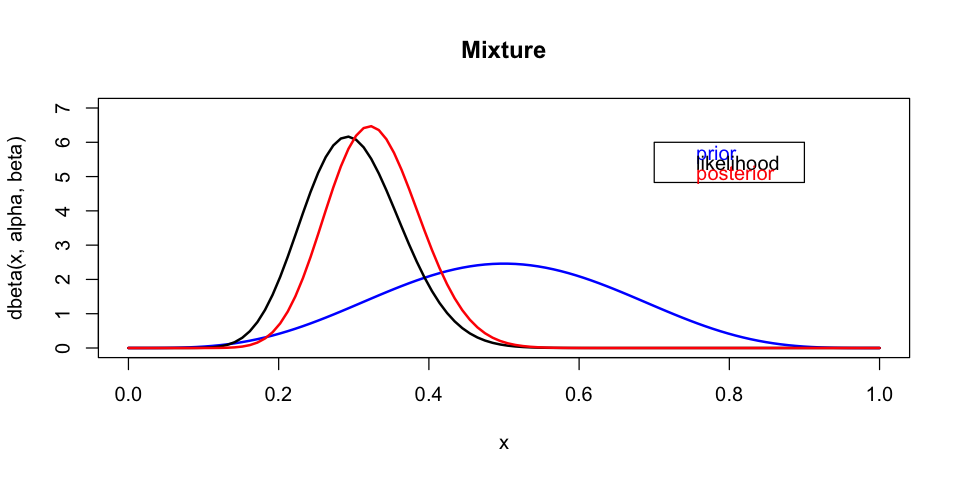

In [170]:
plot(x, dbeta(x,alpha,beta), lwd=2, type='l', col='blue',ylim=c(0,7), main="Mixture")
lines(x,dbeta(x,15,35), type='l',lwd=2,xlab="Bias",ylab="Likelihood")
lines(x,dbeta(x,alpha + 15 - 1,beta + 35 - 1),lwd=2, col='red')
legend(0.7,6,legend = c("prior","likelihood","posterior"), text.col = c("blue","black","red"))

# Neat!

This is how Bayesian inference works.

Build a model

Identify parameters and set priors

Compute likelihood

Obtain posterior distribution\*

** this is hard to do in the general case.*

# How Stan Works

Define a model (structure, priors, likelihood)

Provide data

Generate samples from it

Use the samples to say things about the model

In [134]:
library("rstan")

In [135]:
model <- "
data {
  int h;
  int N;
}
parameters {
  real<lower=0,upper=1> p;
}
model {
  p ~ beta(5,5);
  h ~ binomial(N,p);
}"
model.file <- "model.stan"
writeLines(model, con=model.file)

In [136]:
data <- list(N = 50, h=15)

fit <- stan(file = model.file, data = data, 
            iter = 1000, chains = 4)




SAMPLING FOR MODEL 'model' NOW (CHAIN 1).

Chain 1, Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1, Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1, Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1, Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1, Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1, Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1, Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1, Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1, Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1, Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1, Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1, Iteration: 1000 / 1000 [100%]  (Sampling)
 Elapsed Time: 0.005496 seconds (Warm-up)
               0.00561 seconds (Sampling)
               0.011106 seconds (Total)


SAMPLING FOR MODEL 'model' NOW (CHAIN 2).

Chain 2, Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 2, Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 2, Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 2, Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 

In [137]:
print(fit)


Inference for Stan model: model.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
p      0.33    0.00 0.06   0.22   0.29   0.33   0.37   0.46  1586    1
lp__ -38.71    0.02 0.72 -40.89 -38.91 -38.44 -38.25 -38.19   855    1

Samples were drawn using NUTS(diag_e) at Tue Nov 21 15:32:42 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [138]:
source("~/GDrive/Projects/DBDA/lib/DBDA2E-utilities.R")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



In [139]:
codaSamples = mcmc.list( lapply( 1:ncol(fit) , 
                                   function(x) { mcmc(as.array(fit)[,x,]) } ) )

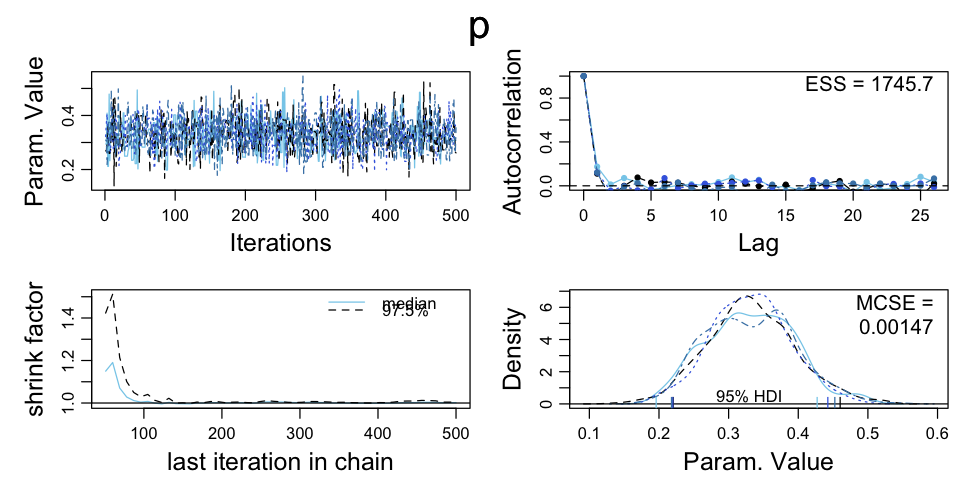

In [141]:
diagMCMC(codaSamples,parName = 'p')

# Summary

Bayesian analysis can be used to combine more than one source of information about a parameter value

Modelling is still about estimating parameters, but the *distribution* is important and not just the most likely estimate

Stan can hide some of the difficulty in using Bayesian analysis

Learn more: Krushke: *Doing Bayesian Data Analysis 2nd Edition* gives a tour of frequentist models and their Bayesian equivalents

<img src="customLogo.png">
